## 4차 과제 - Hyperparameter Tuning을 해보자
- 주제: 하이퍼파라미터 튜닝 기법 학습
- 데이터: The History of Baseball(Pitching Data) https://www.kaggle.com/datasets/seanlahman/the-history-of-baseball?select=pitching.csv
- 사용 라이브러리: pandas, numpy, matplotlib, sklearn, imblearn, bayes_opt

### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, SMOTE, train_test_split, RandomForestClassifier, RandomizedSearchCV, GridSearchCV, BayesianOptimization, accuracy_score

In [7]:
!pip install numpy pandas matplotlib imbalanced-learn scikit-learn bayesian-optimization

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from bayes_opt import BayesianOptimization

1.2 데이터를 불러오고 info()를 통해 데이터를 살펴보세요.

In [10]:
df=pd.read_csv('/content/drive/MyDrive/pitching.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44139 entries, 0 to 44138
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  44139 non-null  object 
 1   year       44139 non-null  int64  
 2   stint      44139 non-null  int64  
 3   team_id    44139 non-null  object 
 4   league_id  44008 non-null  object 
 5   w          44139 non-null  int64  
 6   l          44139 non-null  int64  
 7   g          44139 non-null  int64  
 8   gs         44139 non-null  int64  
 9   cg         44139 non-null  int64  
 10  sho        44139 non-null  int64  
 11  sv         44139 non-null  int64  
 12  ipouts     44138 non-null  float64
 13  h          44139 non-null  int64  
 14  er         44139 non-null  int64  
 15  hr         44139 non-null  int64  
 16  bb         44139 non-null  int64  
 17  so         44139 non-null  int64  
 18  baopp      42614 non-null  float64
 19  era        44049 non-null  float64
 20  ibb   

1.3 null 값이 있는 컬럼은 모두 삭제하겠습니다(원래는 다른 처리를 해야 하지만 컬럼 수는 충분하니까..ㅎㅎ 야구 잘 몰라서 그런 거 아닙니다.).

In [12]:
df.isnull().sum()

player_id        0
year             0
stint            0
team_id          0
league_id      131
w                0
l                0
g                0
gs               0
cg               0
sho              0
sv               0
ipouts           1
h                0
er               0
hr               0
bb               0
so               0
baopp         1525
era             90
ibb          14575
wp             133
hbp            559
bk               0
bfp            239
gf             133
r                0
sh           32900
sf           32900
g_idp        43394
dtype: int64

In [13]:
df.dropna(axis=1,inplace=True)

In [14]:
df

,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,bechtge01,1871,1,PH1,1,2,3,3,2,0,0,43,23,0,11,1,0,42
1,brainas01,1871,1,WS3,12,15,30,30,30,0,0,361,132,4,37,13,0,292
2,fergubo01,1871,1,NY2,0,0,1,0,0,0,0,8,3,0,0,0,0,9
3,fishech01,1871,1,RC1,4,16,24,24,22,1,0,295,103,3,31,15,0,257
4,fleetfr01,1871,1,NY2,0,1,1,1,1,0,0,20,10,0,3,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44134,youngch03,2015,1,KCA,11,6,34,18,0,0,0,91,42,16,43,83,0,44
44135,zieglbr01,2015,1,ARI,0,3,66,0,0,0,30,48,14,3,17,36,0,17
44136,zimmejo02,2015,1,WAS,13,10,33,33,0,0,0,204,82,24,39,164,1,89
44137,zitoba01,2015,1,OAK,0,0,3,2,0,0,0,12,8,4,6,2,0,8


1.4 연도 별로 몇개의 데이터가 있는 지 확인 후 데이터가 얼마 없는 과거 데이터는 삭제하겠습니다. 이를 위해 연도 별 데이터 수를 계산하고 line plot으로 그리세요.

In [15]:
df['year'].value_counts()

year
2015    809
2014    746
2009    729
2013    726
2012    722
       ... 
1872     23
1878     22
1877     19
1871     19
1874     17
Name: count, Length: 145, dtype: int64

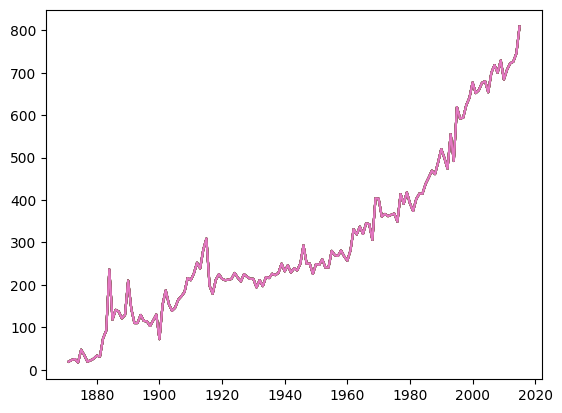

In [16]:
plt.plot(df.groupby('year').count())

1.5 보다 최신 분석을 위해 1980년 이후의 데이터만 남기고 몇개의 데이터가 남았는지 확인하세요.

In [17]:
df=df[df['year']>=1980]

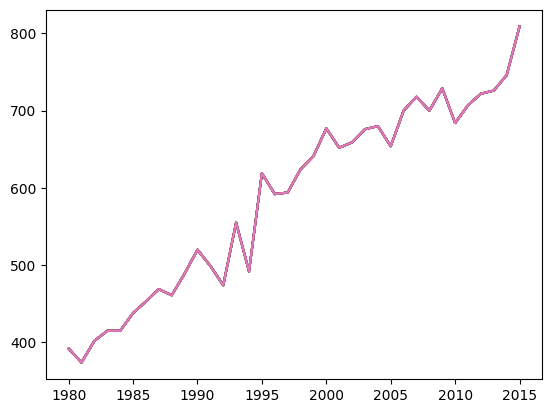

In [18]:
plt.plot(df.groupby('year').count())

In [19]:
df.shape

(21157, 18)

1.6 reset_index()를 통해 재배열하세요.

In [20]:
df=df.reset_index(drop=True)

In [21]:
df

,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,aasedo01,1980,1,CAL,8,13,40,21,5,1,2,193,79,13,66,74,1,83
1,abbotgl01,1980,1,SEA,12,12,31,31,7,2,0,228,98,27,49,78,1,110
2,alexado01,1980,1,ATL,14,11,35,35,7,1,0,227,108,20,74,114,0,120
3,allarbr01,1980,1,TEX,0,1,5,2,0,0,0,13,9,0,10,10,0,13
4,allenne01,1980,1,NYN,7,10,59,0,0,0,22,87,40,7,40,79,1,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21152,youngch03,2015,1,KCA,11,6,34,18,0,0,0,91,42,16,43,83,0,44
21153,zieglbr01,2015,1,ARI,0,3,66,0,0,0,30,48,14,3,17,36,0,17
21154,zimmejo02,2015,1,WAS,13,10,33,33,0,0,0,204,82,24,39,164,1,89
21155,zitoba01,2015,1,OAK,0,0,3,2,0,0,0,12,8,4,6,2,0,8


1.7 투수의 승리 수를 예측해보겠습니다. w 컬럼의 value를 확인해보세요.

In [22]:
df['w'].value_counts()

w
0     5854
1     3197
2     2356
3     1744
4     1453
5     1114
6      878
7      730
9      560
8      557
10     450
11     434
12     384
13     317
14     287
15     242
16     193
17     125
18     102
19      61
20      53
21      32
22      17
24       8
23       7
25       1
27       1
Name: count, dtype: int64

1.8 0승 투수(출전하지 않은 경우도 존재)가 많으므로 승리 수가 0인 데이터는 삭제하겠습니다.

In [23]:
df=df[df['w']!=0]

In [24]:
df['w'].value_counts()

w
1     3197
2     2356
3     1744
4     1453
5     1114
6      878
7      730
9      560
8      557
10     450
11     434
12     384
13     317
14     287
15     242
16     193
17     125
18     102
19      61
20      53
21      32
22      17
24       8
23       7
25       1
27       1
Name: count, dtype: int64

1.9 Regression이 아닌 Classification으로 분석해보겠습니다. 이를 위해 10을 기준으로 w를 10승 이상이면 1, 10승 미만이면 0인 Binary 형태로 변환하세요.

In [25]:
df['w']=df['w'].apply(lambda x:1 if x>=10 else 0)

<ipython-input-25-4a2e227d1441>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['w']=df['w'].apply(lambda x:1 if x>=10 else 0)


1.10 value_counts()를 통해 잘 나눠졌는지 확인해보세요.

In [26]:
df['w'].value_counts()

w
0    12589
1     2714
Name: count, dtype: int64

1.11 종속 변수의 밸런스가 맞지 않는 것으로 확인됩니다. 이를 해결하기 위해 Under Sampling 혹은 Over Sampling 기법을 사용할 수 있는데 Under Sampling의 경우 데이터가 많지 않는 상황에서 사라지는 데이터가 과도하게 많으므로 Over Sampling 기법 중 SMOTE 기법을 사용해보겠습니다. 사용하기 전에 player_id, year, team_id 컬럼은 지우고 가겠습니다.

In [27]:
df=df.drop(['player_id','year','team_id'],axis=1)

In [28]:
df

,stint,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,1,0,13,40,21,5,1,2,193,79,13,66,74,1,83
1,1,1,12,31,31,7,2,0,228,98,27,49,78,1,110
2,1,1,11,35,35,7,1,0,227,108,20,74,114,0,120
4,1,0,10,59,0,0,0,22,87,40,7,40,79,1,43
6,1,0,8,35,14,0,0,2,132,53,8,43,75,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21147,1,0,5,12,9,0,0,0,52,30,9,18,26,0,30
21148,1,0,4,16,9,0,0,0,67,33,12,27,52,0,38
21151,1,0,0,20,0,0,0,0,23,18,10,7,21,0,18
21152,1,1,6,34,18,0,0,0,91,42,16,43,83,0,44


1.12 SMOTE 기법을 활용해 w의 balance를 맞추세요(sampling_strategy='auto', random_state = 123).

In [29]:
x=df.drop(['w'],axis = 1)
y=df['w']

smote=SMOTE(sampling_strategy='auto', random_state=123)
x_resampled, y_resampled=smote.fit_resample(x,y)

1.13 balance가 잘 맞춰졌는지 확인하세요.

In [30]:
pd.Series(y_resampled).value_counts()
resampled=pd.concat([y_resampled, x_resampled], axis = 1)

In [31]:
resampled['w'].value_counts()

w
0    12589
1    12589
Name: count, dtype: int64

1.14 SMOTE의 동작 방식에 대해 작성하고 Over Sampling의 장/단점에 대해 작성하세요.

동작 방식은 데이터의 개수가 적은 클래스의 표본을 가져온 뒤 임의의 값을 추가하여 새로운 샘플을 만들어 데이터에 추가하는 오버샘플링 방식이다.

데이터의 균형을 맞출 수 있다는 장점이 있지만 오버피팅될 수 있다는 단점이 있다.

1.15 다른 Over Sampling 기법들엔 어떤 것들이 있는지 작성하세요(2개 이상).

1. SMOTE-NC
2. SMOTE-Tomek

### 2. 예측 및 분석

2.1 본격적으로 분석을 진행하겠습니다. 본 차시는 Hyperparameter Tuning에 대해 학습하는 것이 목적이므로 모델은 RandomForest Classifier 하나만 사용하도록 하겠습니다. 먼저 데이터를 train, validation, test 3개로 나누세요(trian-60%, val-20%, test-20%).

In [32]:
x_train, x_test, y_train, y_test=train_test_split(x_resampled,y_resampled,random_state=123,test_size=0.2)

In [33]:
x_train, x_val, y_train, y_val=train_test_split(x_train,y_train,random_state=123,test_size=0.2)

2.2 train test에 validation set을 추가하는 이유가 뭔지 작성하세요.

파라미터를 튜닝하고 과적합되지는 않았는지 검증하기 위해서이다.

2.3 Randomized SearchCV로 최적의 파라미터 셋을 찾으세요(성능 지표는 accuracy score).

In [34]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [35]:
model=RandomForestClassifier()

random_search=RandomizedSearchCV(model,param_grid,n_iter=10,cv=5)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]})

In [36]:
print(random_search.best_params_)
print(random_search.best_score_)

{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'gini', 'bootstrap': False}
0.956308388670583


2.4 위에서 지정한 hyperparameter들이 각각 무엇을 의미하는지 작성하세요.

- n_estimators: 의사결정트리개수
- max_depth: 트리의 최대 깊이
- min_samples_split: 노드를 분할하기 위한 최소 샘플 개수
- min_samples_leaf: 리프 노드에 있어야 하는 최소 샘플 수
- bootstrap: 랜덤으로 선택한 샘플로부터 훈련될지 말지 결정
- criterion: 분할 품질 측정 기준

2.5 Grid SearchCV로 최적의 파라미터 셋을 찾으세요.

In [37]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [38]:
grid_search=GridSearchCV(model, param_grid, cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]})

In [39]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.9578601129522747


2.6 Randomized SearchCV와 Grid SearchCV의 차이와 장단점에 대해 설명하세요.

Randomized SearchCV는 데이터가 많고 파라미터 튜닝이 많이 필요할 때 효과적이고(시간상 효율적), Grid SearchCV는 성능 개선을 위해 모든 파라미터 조합을 진행해야할 때 사용하는 것이 적절하다(튜닝해야 할 파라미터가 많을 경우 비효율적)

<figure>
    <img src="https://miro.medium.com/v2/resize:fit:781/1*8uSZqUSGa-UGF-0CDBd4Jw.png">
</figure>

2.7 이번엔 Bayesian Optimization을 사용해 파라미터 튜닝을 진행해보겠습니다.

In [40]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [41]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.2 MB/s eta 0:00:00


In [42]:
from skopt import BayesSearchCV
bayes_search=BayesSearchCV(model,param_grid,cv=3)
bayes_search.fit(x_train,y_train)

BayesSearchCV(cv=3, estimator=RandomForestClassifier(),
              search_spaces={'bootstrap': [True, False],
                             'criterion': ['gini', 'entropy'],
                             'max_depth': [None, 10, 20, 30],
                             'min_samples_leaf': [1, 2, 4],
                             'min_samples_split': [2, 5, 10],
                             'n_estimators': [10, 50, 100, 200]})

In [43]:
print(bayes_search.best_params_)
print(bayes_search.best_score_)

OrderedDict([('bootstrap', False), ('criterion', 'entropy'), ('max_depth', 30), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 200)])
0.9571153726804443


2.8 진행한 튜닝 과정에서 찾은 최적의 파라미터 셋으로 다시 학습을 진행한 후 최종 accuracy score을 출력하세요.

In [44]:
best_model=grid_search.best_estimator_
best_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30,
                       n_estimators=200)

In [45]:
y_pred=best_model.predict(x_test)

In [46]:
accuracy_score(y_test,y_pred)

0.9612787926926132

### 3. 자유분석

최적의 파라미터 셋을 찾고 성능을 높여보세요.

In [47]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3,4,5,6,7],
    'min_samples_split': [2,3,5,7,9],
    'min_samples_leaf': [1, 2,3,4,5],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_features' : ['squrt', 'log2']
}

In [48]:
grid_search=GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
끝나질 않는군요